In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
df=pd.read_csv('../dataset/Obesity Classification.csv')

In [5]:
X=df.drop(columns=['ID','Label'])
Y=df['Label']

In [6]:
X

,Age,Gender,Height,Weight,BMI
0,25,Male,175,80,25.3
1,30,Female,160,60,22.5
2,35,Male,180,90,27.3
3,40,Female,150,50,20.0
4,45,Male,190,100,31.2
...,...,...,...,...,...
103,11,Male,175,10,3.9
104,16,Female,160,10,3.9
105,21,Male,180,15,5.6
106,26,Female,150,15,5.6


In [7]:
Catgorigal_data=X.select_dtypes(['object']).columns
numerical_data=X.select_dtypes(['number']).columns

In [8]:
Preprocess=ColumnTransformer(transformers=[('transform',OneHotEncoder(),Catgorigal_data),('scale',StandardScaler(),numerical_data)])

In [9]:
tranform=Pipeline([('preprocess',Preprocess),('pca',PCA(n_components=2))])

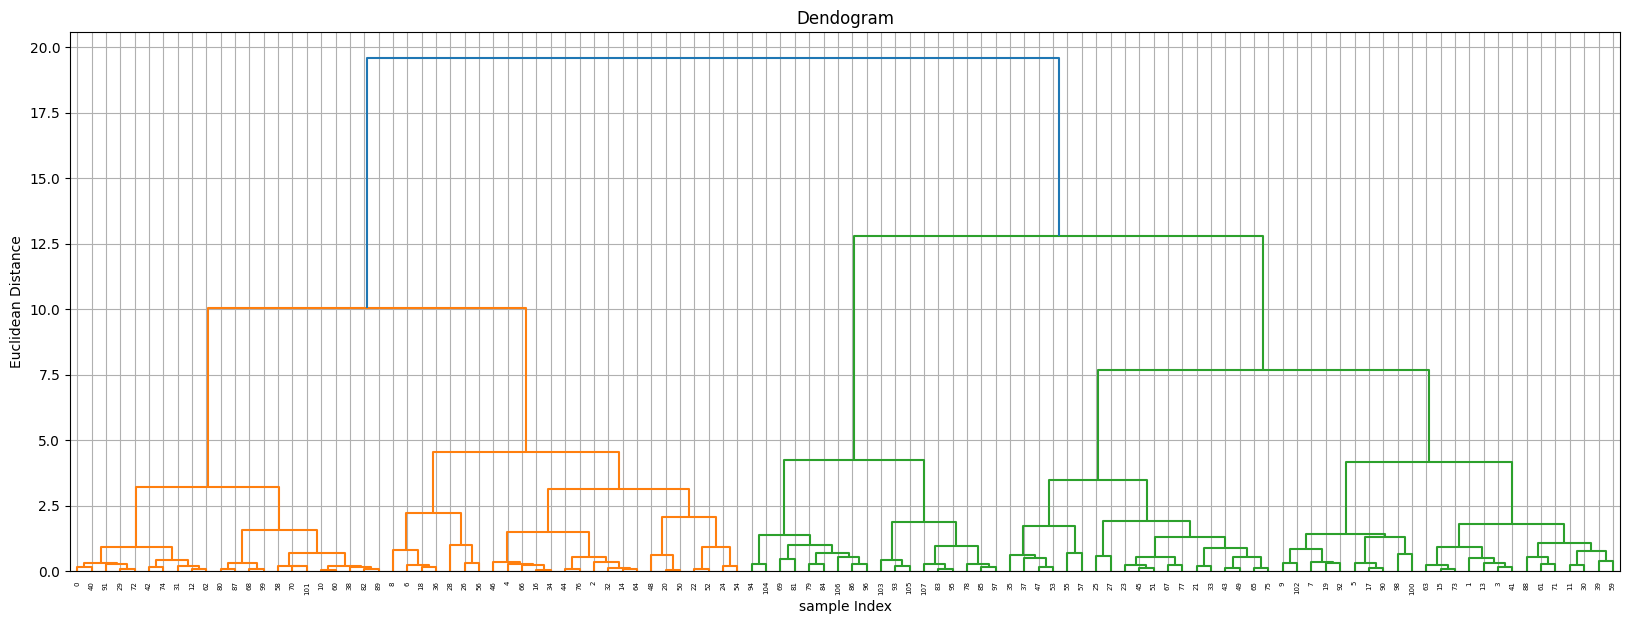

In [10]:
#aglomerative clustering
import scipy.cluster.hierarchy as sc 
plt.figure(figsize=(20,7))
plt.title('dendograms')
sc.dendrogram(sc.linkage(tranform.fit_transform(X),method='ward'))
plt.title('Dendogram')
plt.xlabel('sample Index')
plt.ylabel('Euclidean Distance')
plt.grid()

In [11]:
pipe=Pipeline([('preprocess',Preprocess),('pca',PCA(n_components=2)),('model',AgglomerativeClustering(n_clusters=3,linkage='ward'))])

In [12]:
pipe.fit(X)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('transform', OneHotEncoder(),
                                                  Index(['Gender'], dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'BMI'], dtype='object'))])),
                ('pca', PCA(n_components=2)),
                ('model', AgglomerativeClustering(n_clusters=3))])

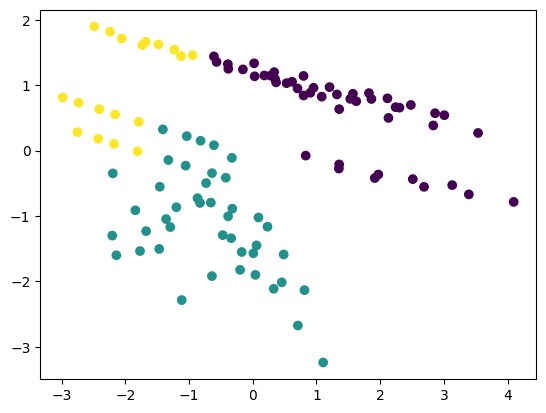

In [13]:
plt.scatter(tranform.fit_transform(X)[:,0],tranform.fit_transform(X)[:,1],c=pipe['model'].labels_)

In [14]:
silhouette_score(tranform.fit_transform(X),pipe['model'].labels_)

0.43611339950589534

In [15]:
silhouette_coefficients=[]

for k in range(2,11):
    agglo =AgglomerativeClustering(n_clusters=k,linkage='ward')
    agglo.fit(tranform.fit_transform(X))
    score =silhouette_score(tranform.fit_transform(X),agglo.labels_)
    silhouette_coefficients.append(score)

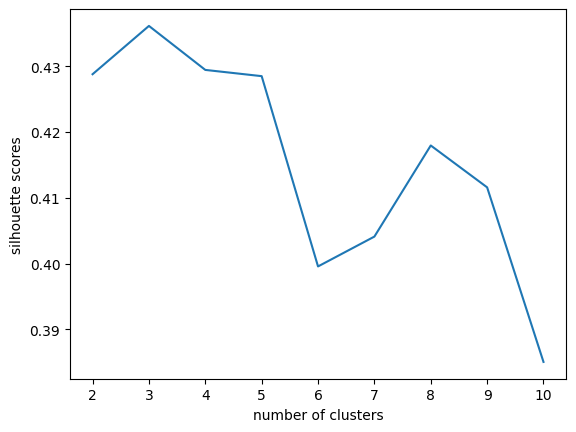

In [16]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('number of clusters')
plt.ylabel('silhouette scores')
plt.show()